# Outliers

- Many machine learning algorithms are sensitive to the range and distribution of attribute values in the input data.

- Outliers in input data can skew and mislead the training process of machine learning algorithms resulting in longer training times, less accurate models and ultimately poorer results.

## Algorithms which are effected by outliers

### Algorithms which are not effected by Outliers-
1. Naive Bayes
2. SVM
3. DecisionTree Classifier and Regressor
4. Ensemble Techniques
5. KNN

### Algorithms which are  effected by Outliers-
1. Linear Regression
2. Logistic Regression
3. KMeans
4. Hierarchial Clustering
5. PCA
6. Neural Networks

### Wheather should we keep or remove outliers - 
1. outliers in case of credit card dataset may be because of fraudelent activities so it should be kept.


In [2]:
# Importing Libraries for ML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# Importing Data

df = pd.read_csv('C:/Users/Shubham/Documents/Data Science/Notebooks/00. Data_Store/titanic.csv')
df.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
df["Age"].isnull().sum()

177

### See the difference before and after adding some outliers in distplot, as their is no outliers initially we add outliers at null values to see the difference


<AxesSubplot:xlabel='Age', ylabel='Density'>

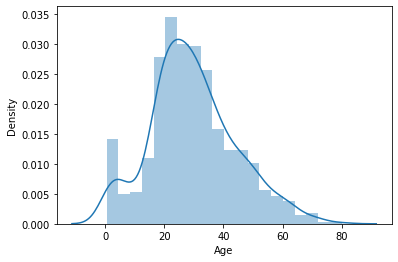

In [5]:
sns.distplot(df["Age"].dropna())

<AxesSubplot:xlabel='Age', ylabel='Density'>

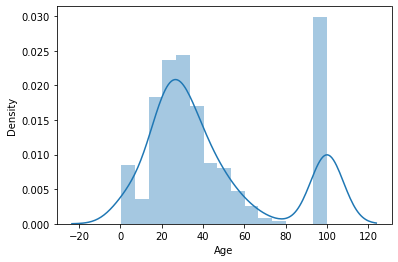

In [6]:
sns.distplot(df["Age"].fillna(100))

# 1. Outliers in Gaussian distribution/ Normal distribution

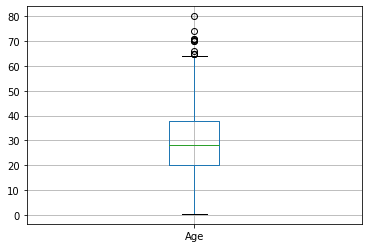

In [7]:
figure=df.boxplot(column="Age")

In [8]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Assuming Age follows a Gaussian Distribution we will calculate the boundaries which differentiate the outliers 

### Gaussian distribution - 
According to gaussian ditribution the values that falls beyond the 3rd standerd deviation are considered as outliers. hence keeping this in mind we find the upper and lower boundaries are calculated as follows.
Data that falls under distribution is 99.7 %

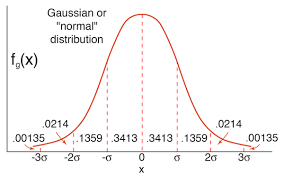


Anything that falls after these upper and lower bounds is a outliers

In [28]:
upper_bound = df["Age"].mean() + 3*df["Age"].std()
lower_bound = df["Age"].mean() - 3*df["Age"].std()

print(upper_bound)
print(lower_bound)
print(df["Age"].mean())

73.27860964406094
-13.880374349943303
29.69911764705882



---------------------------------------------------------------------------
---------------------------------------------------------------------------
# 2. Outliers in Skewed Data



### Calculate Interquantile range (Difference between 75% and 25%) to get the boundaries

After getting Interquantile range we can find out the **Outliers and Extreme Outliers** by using IQR value and multiplying factors 1.5 and 3 which is commonly used but generally depends upon domain of data.

In [30]:
IQR = df["Fare"].quantile(0.75)-df["Fare"].quantile(0.25)
IQR

23.0896

## 1. Outliers

In [31]:
upper_bridge = df["Fare"].quantile(0.75) + (IQR*1.5)
lower_bridge = df["Fare"].quantile(0.25) - (IQR*1.5)

print(upper_bridge)
print(lower_bridge)

65.6344
-26.724


### From Above it is seen that any Age that falls beyond 64 is a outlier

## 2. Extreme Outliers

In [32]:
upper_bridge = df["Fare"].quantile(0.75) + (IQR*3)
lower_bridge = df["Fare"].quantile(0.25) - (IQR*3)

print(upper_bridge)
print(lower_bridge)

100.2688
-61.358399999999996


### From Above it is seen that any Age that falls beyond 91 is a outlier



In this data **Fare** data is skewed so we use that data for handling outliers in skewed dataset

In [33]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

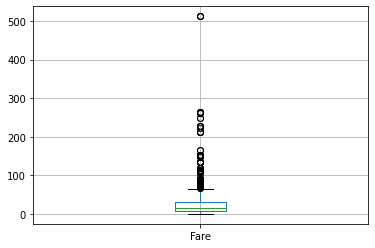

In [34]:
figure=df.boxplot(column="Fare")

<AxesSubplot:xlabel='Fare', ylabel='Density'>

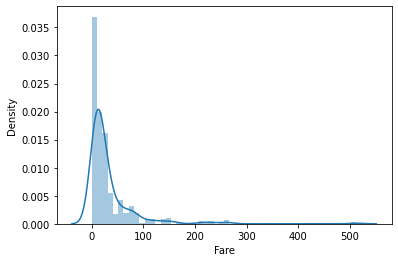

In [35]:
sns.distplot(df["Fare"])

# 3. Removing the Outliers

In [36]:
data = df.copy()

In [37]:
data.loc[data["Age"]>73, "Age"]=73

In [38]:
data.loc[data["Fare"]>100, "Fare"]=100

In [39]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 1. Difference in Normal data after handling outliers

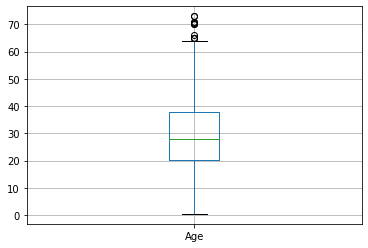

In [54]:
figure=data.boxplot(column="Age")

### Before

<AxesSubplot:xlabel='Age', ylabel='Density'>

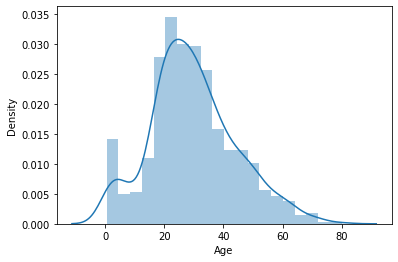

In [55]:
sns.distplot(df["Age"])

### After

<AxesSubplot:xlabel='Age', ylabel='Density'>

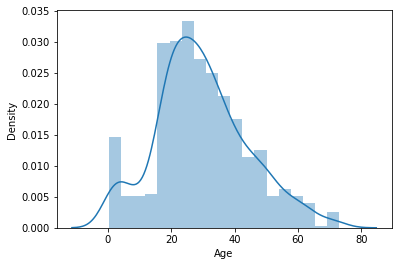

In [56]:
sns.distplot(data["Age"])

# 2. Difference in Skewed data after handling outliers

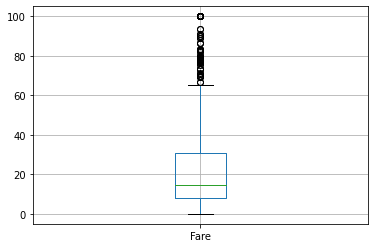

In [57]:
figure=data.boxplot(column="Fare")

### Before 

<AxesSubplot:xlabel='Fare', ylabel='Density'>

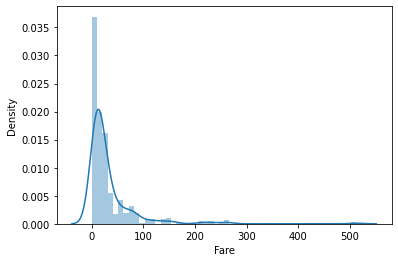

In [58]:
sns.distplot(df["Fare"])

### After

<AxesSubplot:xlabel='Fare', ylabel='Density'>

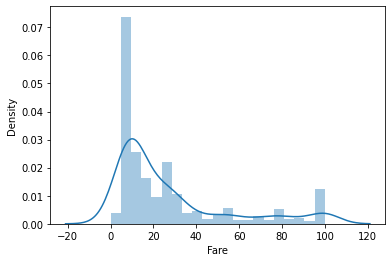

In [59]:
sns.distplot(data["Fare"])

# Functions For Plotting, Finding and Removing the Outliers

In [1]:
# function to plot the distplot and boxplot for given dataframe and column
def plot_distribution(df, col):
    fig, ax =plt.subplots(1,2)
    plt.figure(figsize=(40,10))
    sns.distplot(df[col], ax=ax[0])  
    df.boxplot(column=col, ax=ax[1])
    plt.show()

# function to find outliers in normally distributed data
def find_outliers_normal(data, col):
    upper_bound = data[col].mean() + 3*data[col].std()
    lower_bound = data[col].mean() - 3*data[col].std()

    upper_outliers = len(data.loc[data[col]>upper_bound])
    lower_outliers = len(data.loc[data[col]>upper_bound])
    
    print("Outliers in '",col,"' Column")
    print("Upper Bound - ",upper_bound)
    print("Lower Bound - ",lower_bound)
    print("Number of Upper Outliers - ",upper_outliers)
    print("Number of Lower Outliers - ",lower_outliers)
    print("")

# function to find outliers in skewed data
def find_outliers_skewed(df, col):
    IQR = df[col].quantile(0.75)-df[col].quantile(0.25)
    
    upper_bound = df[col].quantile(0.75) + (IQR*1.5)
    lower_bound = df[col].quantile(0.25) - (IQR*1.5)
    
    upper_outliers = len(df.loc[df[col]>upper_bound])
    lower_outliers = len(df.loc[df[col]<lower_bound])
    
    
    print("Outliers in '",col,"' Column")
    print("Upper Bound - ",upper_bound)
    print("Lower Bound - ",lower_bound)
    print("Number of Upper Outliers - ",upper_outliers)
    print("Number of Lower Outliers - ",lower_outliers)
    print("")


    
# function to remove outliers from normally distributed data.
def remove_outliers_normal(df, col):
    df = df.copy(deep=True)
    upper_bound = df[col].mean() + 3*df[col].std()
    lower_bound = df[col].mean() - 3*df[col].std()
    
    df.loc[df[col]>=upper_bound, col] = upper_bound
    df.loc[df[col]<=lower_bound, col] = lower_bound
    
    return df


# function to remove outliers from skewed data.
def remove_outliers_skewed(df, col):
    IQR = df[col].quantile(0.75)-df[col].quantile(0.25)
    
    upper_bridge = df[col].quantile(0.75) + (IQR*1.5)
    lower_bridge = df[col].quantile(0.25) - (IQR*1.5)
    
    df.loc[df[col]>=upper_bridge, col] = upper_bridge
    df.loc[df[col]<=lower_bridge, col] = lower_bridge
    
    return df